In [2]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

In [23]:
# r0 = pd.read_csv('pickles/r0.csv')
# r1 = pd.read_csv('pickles/r1.csv')
# r2 = pd.read_csv('pickles/r2.csv')
# r3 = pd.read_csv('pickles/r3.csv')
# r4 = pd.read_csv('pickles/r4.csv')
# r5 = pd.read_csv('pickles/r5.csv')
# r6 = pd.read_csv('pickles/r6.csv')

In [4]:
for i in range(0,7):
    with open('pickles/r'+str(i)+'.pickle', 'rb') as handle:
        locals()['r'+str(i)] = pickle.load(handle)

In [6]:
normdf=pd.read_csv('data/normalized_df.csv')

In [7]:
for k in range(0,7):
    locals()['r_m'+str(k)]=pd.DataFrame()
    for j in tqdm(range(0, 593)):
        for i in normdf.loc[normdf.delivery_area_id==j][['date', 'orders_cnt_normalized']].sort_values(by = 'date',ascending=False)['orders_cnt_normalized']:
            if i!=0:
                median=i
                # print(median)
                locals()['r_m'+str(k)]['predict'+str(j)]=locals()['r'+str(k)]['predict'+str(j)]*median
                break

100%|██████████| 593/593 [00:08<00:00, 72.96it/s] 


In [12]:
for i in range(0,7):
    locals()['r_mr'+str(i)]  = np.ceil(locals()['r'+str(i)]).astype(int)

In [13]:
def matrix_for_simplex(size):
  A = np.zeros(size)
  working_shifts = [4,5,6,7,8]
  count = 0
  for shift in working_shifts:
    k = 0
    for j in range(A.shape[1] - shift + 1):
      for i in range(shift):
        A[j + count][i + k] = 1
      k+=1
    count += j + 1
  return A
#можно кастомить size но тут подстроено под 16 часовой рабочий день, в примере был 11 часовой и матрица 30 x 11, в нашем случае 55 * 16
size = (55, 16)
A = matrix_for_simplex(size)

In [14]:
c = np.ones(55)
#Параметр для модели

**Делаем для каждого из 7 дней таблицу**

In [15]:
Shifts_0_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_0_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_0_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_0_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_0_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_0_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)

    
for i in range(0, 593): #593
  h = r_mr0['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_0_day['predict '+str(i)] = abs(x)

In [23]:
Shifts_1_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_1_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_1_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_1_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_1_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_1_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr1['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_1_day['predict '+str(i)] = abs(x)

In [25]:
Shifts_2_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_2_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_2_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_2_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_2_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_2_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr2['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_2_day['predict '+str(i)] = abs(x)

In [26]:
Shifts_3_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_3_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_3_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_3_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_3_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_3_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr3['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_3_day['predict '+str(i)] = abs(x)

In [27]:
Shifts_4_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_4_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_4_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_4_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_4_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_4_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr4['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_4_day['predict '+str(i)] = abs(x)

In [28]:
Shifts_5_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_5_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_5_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_5_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_5_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_5_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr5['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_5_day['predict '+str(i)] = abs(x)

In [29]:
Shifts_6_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_6_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_6_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_6_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_6_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_6_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r_mr6['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_6_day['predict '+str(i)] = abs(x)

In [30]:
for i in range(0, 7):
    with open('pickles/shifts_'+str(i)+'.pickle', 'wb') as handle:
            pickle.dump(locals()['Shifts_'+str(i)+'_day'], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
def shifts_heatmap(number_of_week, name_of_predict):
    name_of_predict = 'predict '+str(name_of_predict)
    pred0=pickle.load(open('pickles/shifts_'+str(number_of_week)+'.pickle', 'rb')) 
    pred0=pred0[['shift_name',name_of_predict]]
    temp_df = pred0.loc[pred0[name_of_predict]!=0]
    temp_df.reset_index()
    for i in range(7,24):
        temp_df[str(i)]=0.00
    time_dict=dict()
    time_list = [{f'shift_{i}':list(range(int(i.split('-')[0]),int(i.split('-')[1])+1))} for i in [i.split('shift_')[1] for i in temp_df.shift_name]]
    [time_dict.update(i) for i in time_list]
    for i in temp_df.shift_name:
        for j in time_dict[i]:
            temp_df.loc[temp_df.shift_name==i,str(j)]=temp_df.loc[temp_df.shift_name==i][name_of_predict]
    temp_df = temp_df.fillna(0)
    temp_df.index = list(temp_df['shift_name'])
    sns.heatmap(temp_df.drop(['shift_name', name_of_predict], axis=1), cmap='rocket_r').set(title=f'Замощение сменами для региона {name_of_predict} (День недели: {number_of_week})')
    return plt.show()

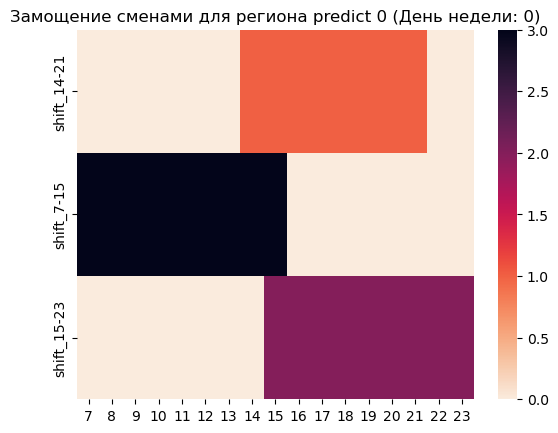

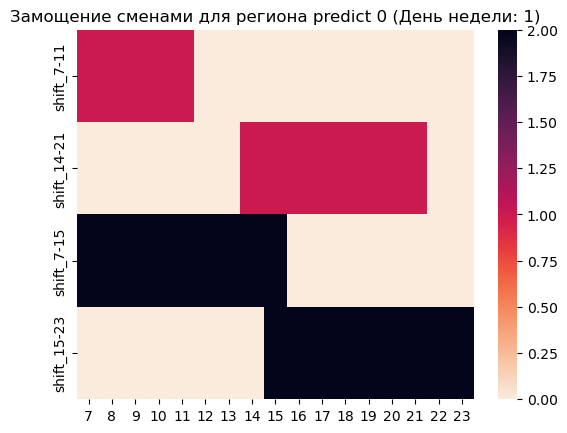

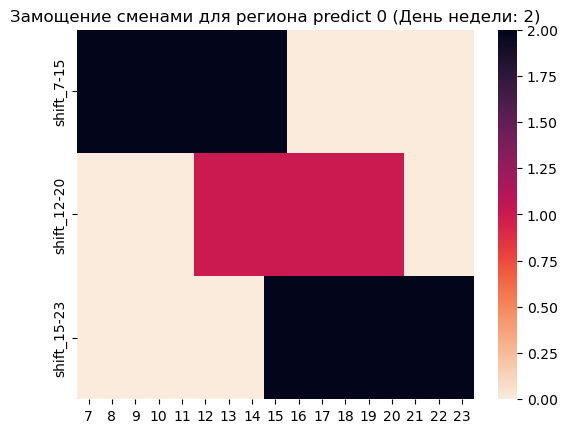

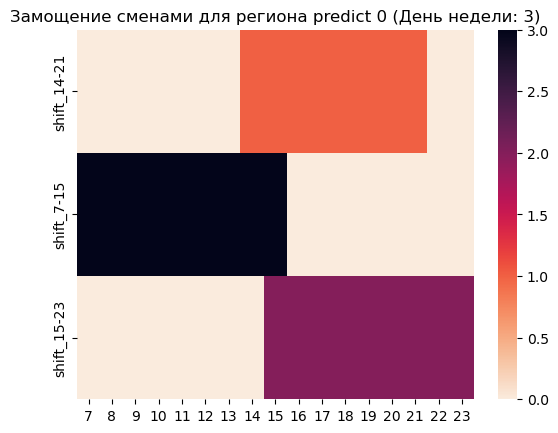

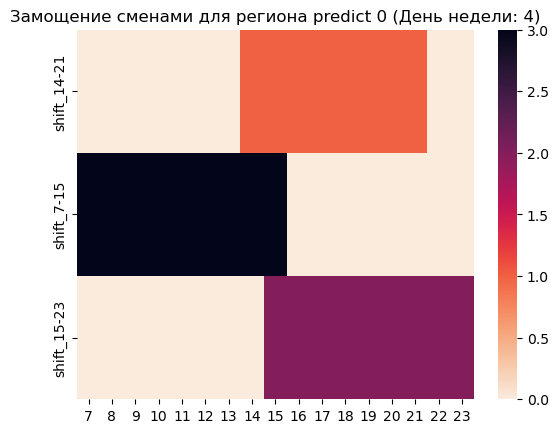

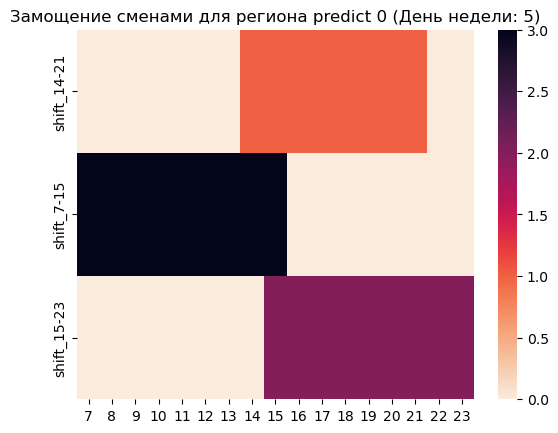

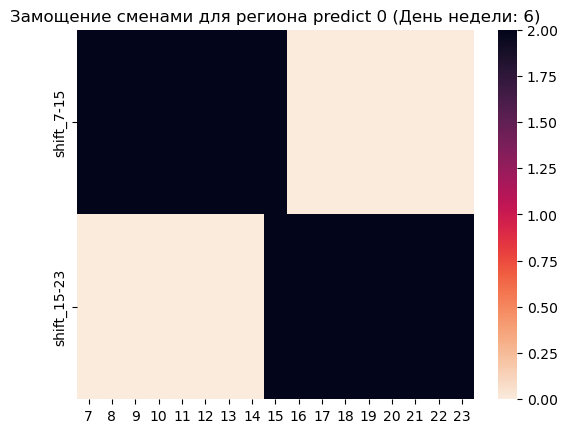

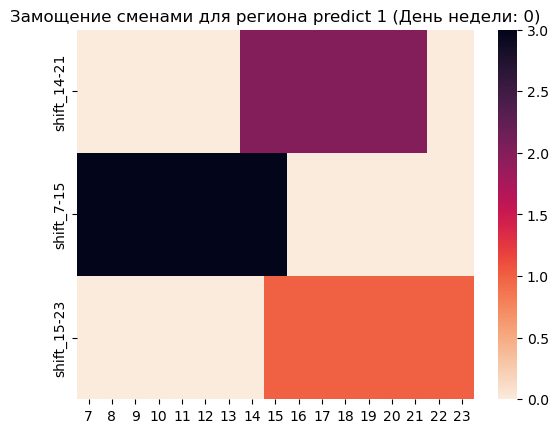

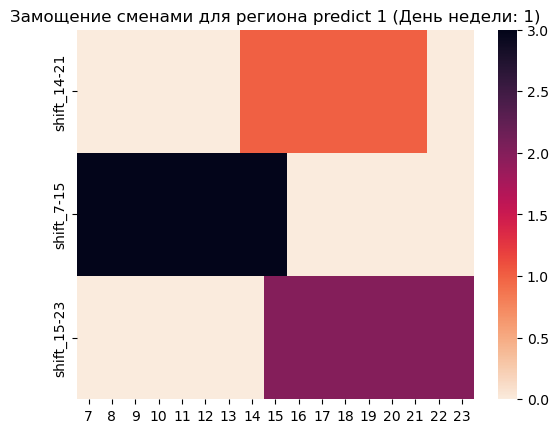

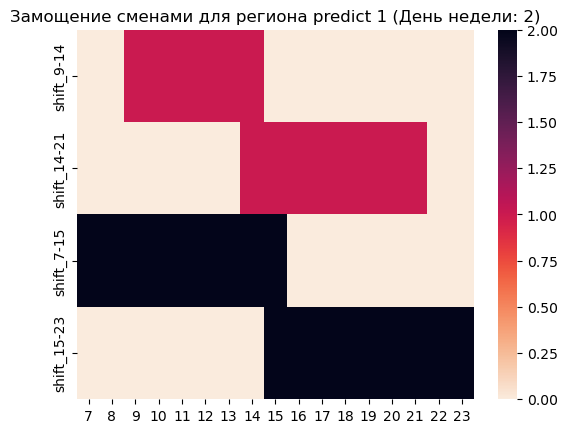

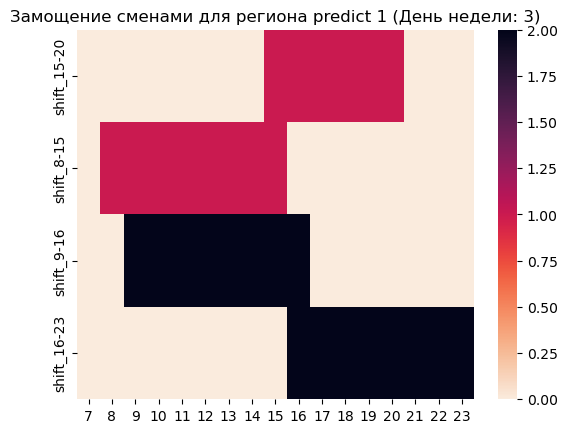

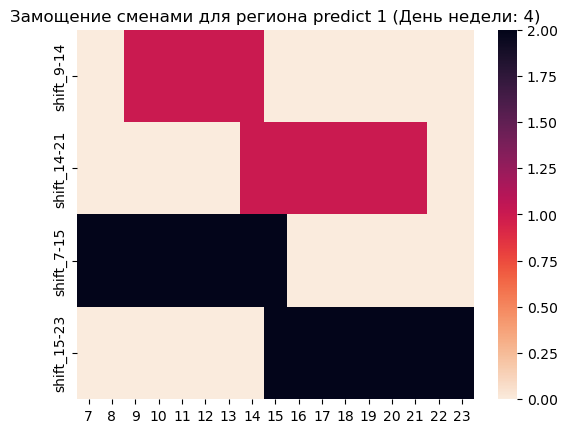

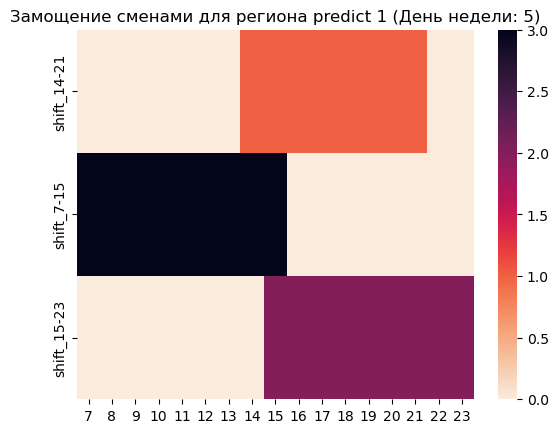

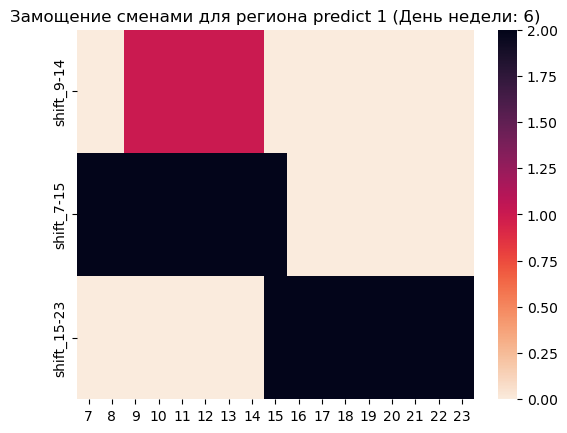

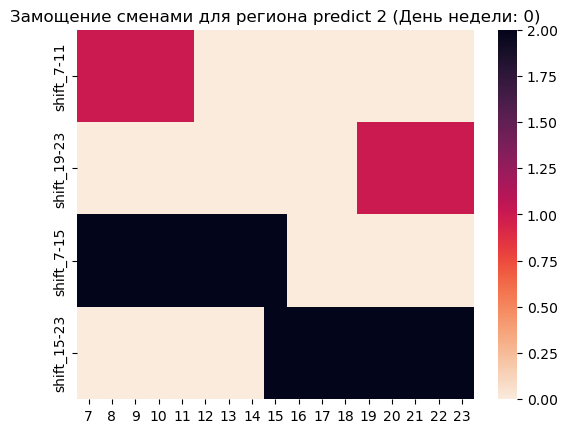

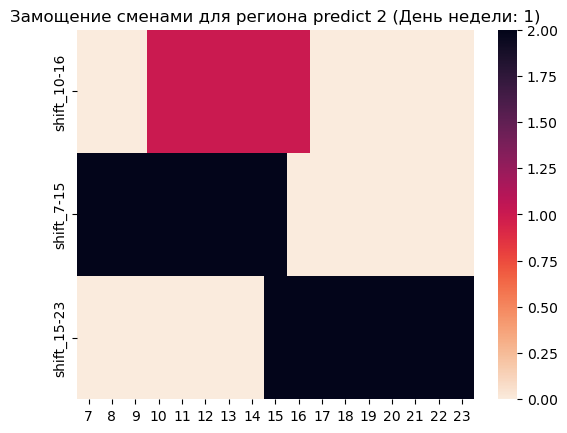

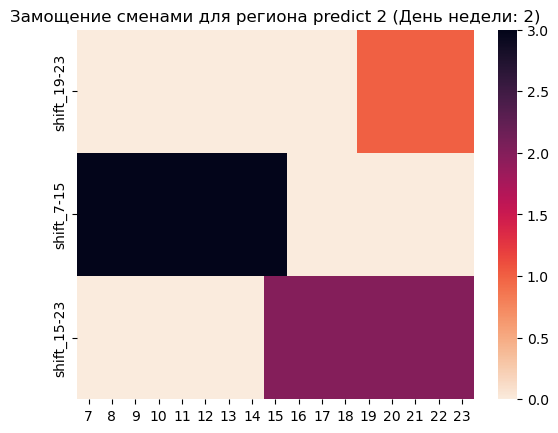

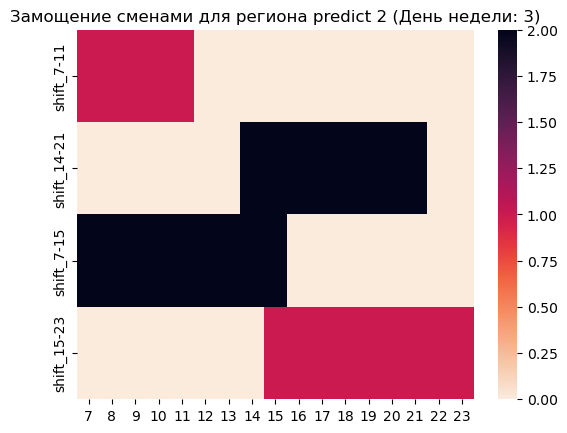

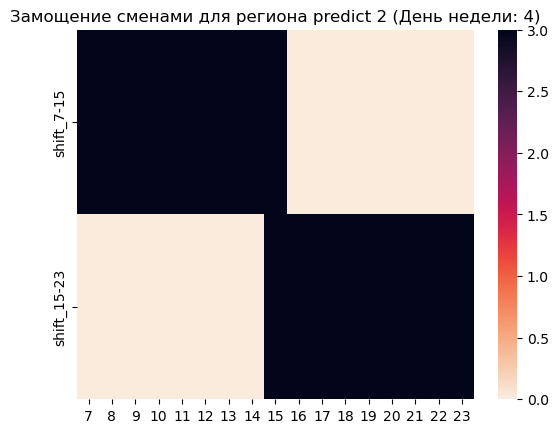

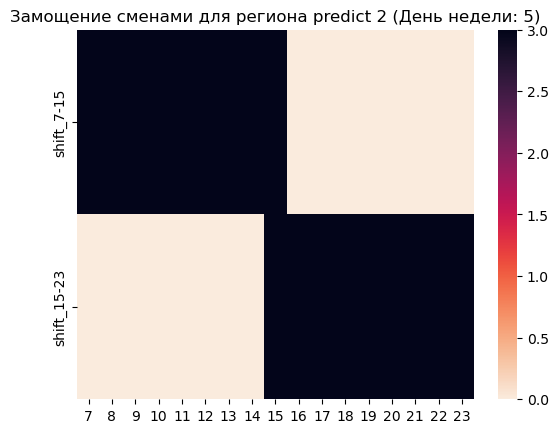

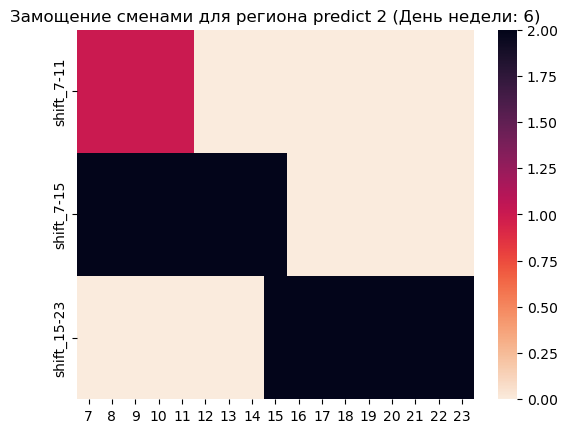

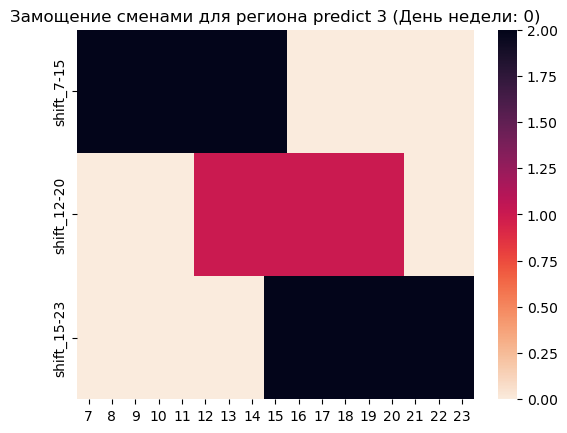

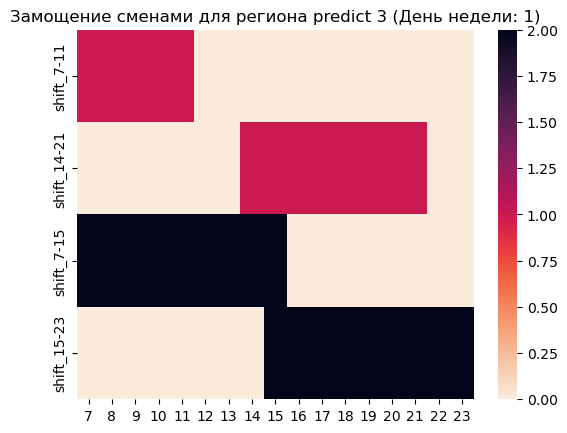

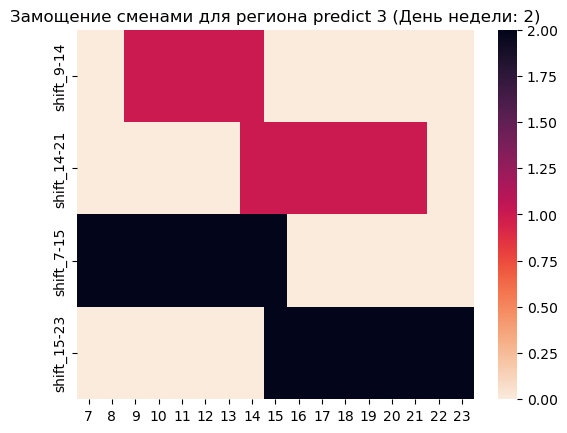

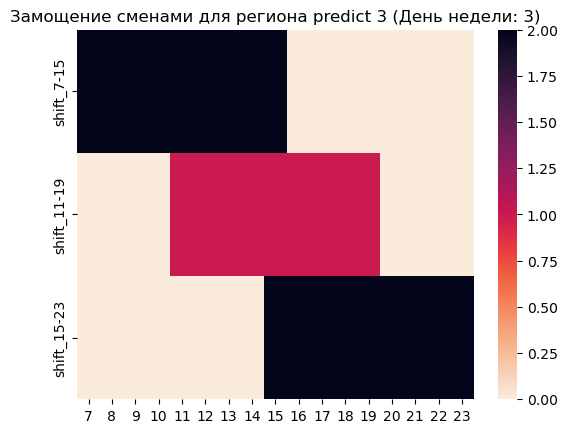

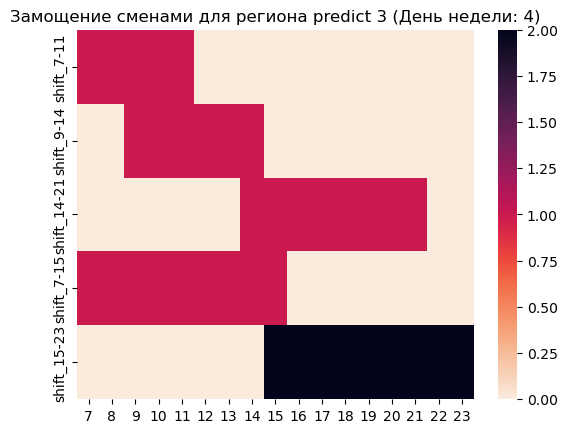

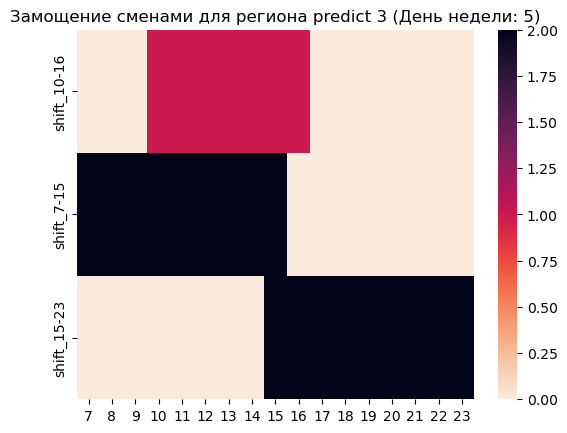

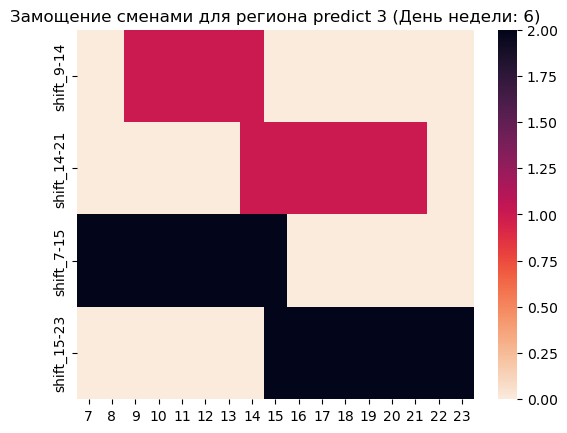

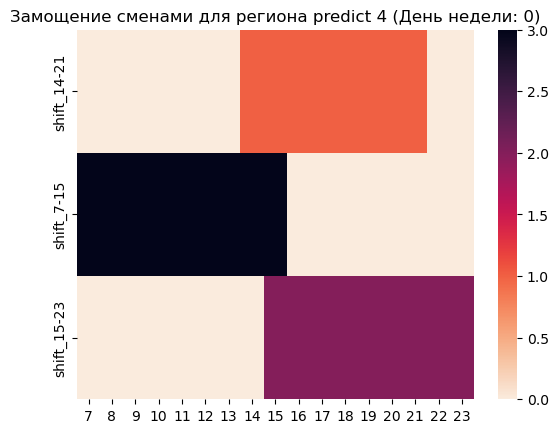

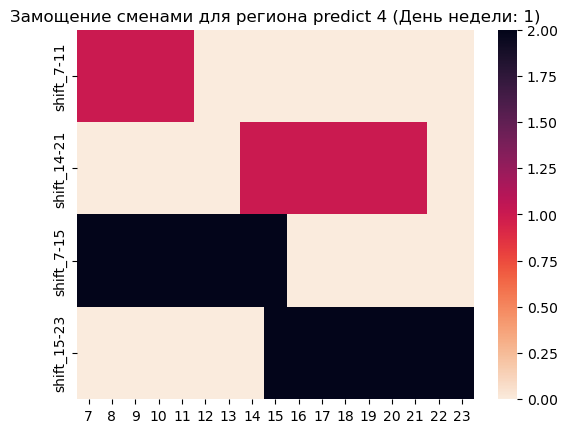

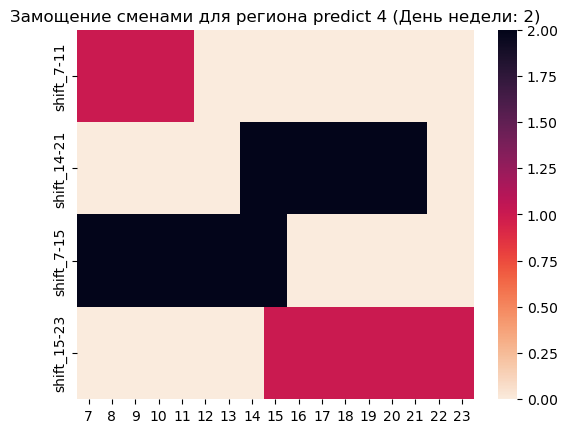

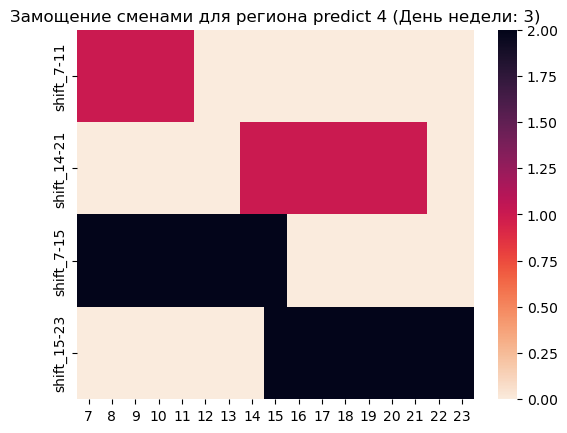

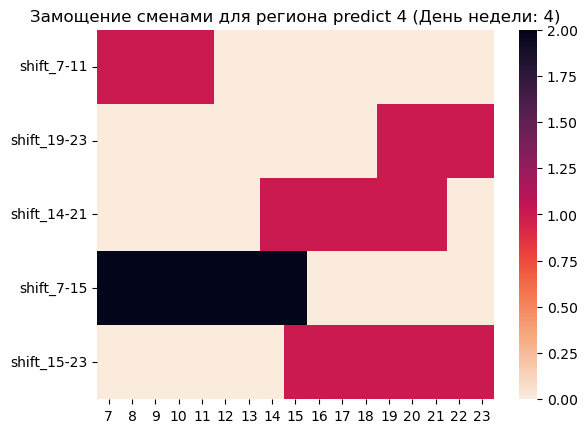

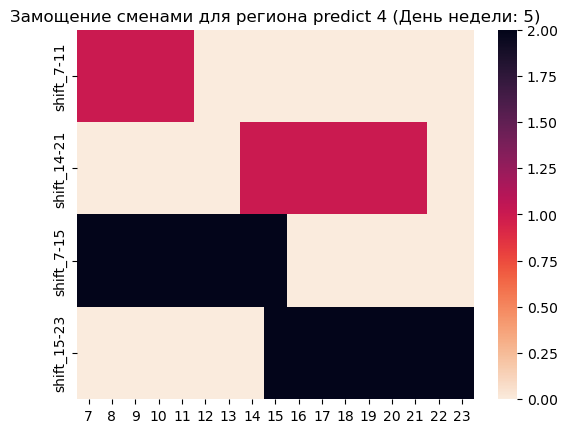

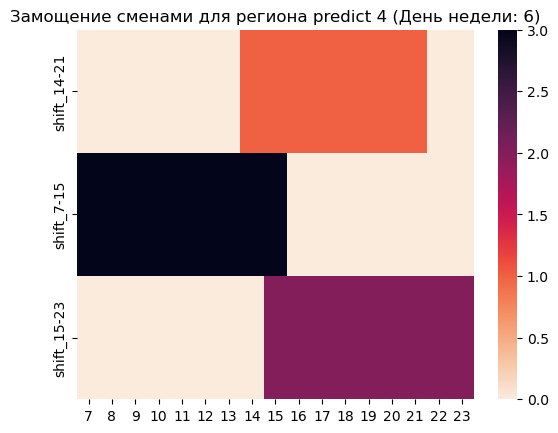

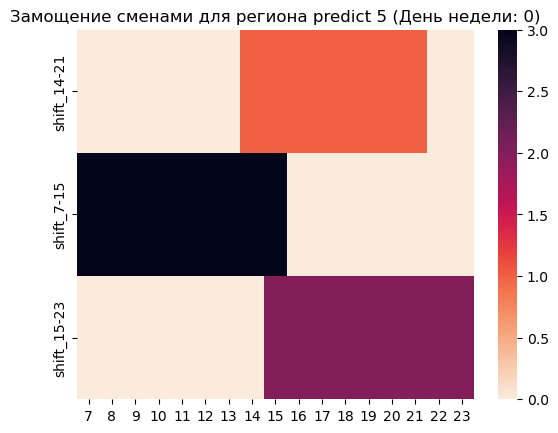

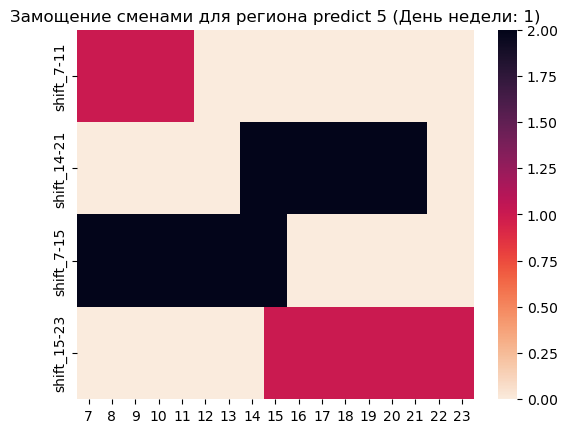

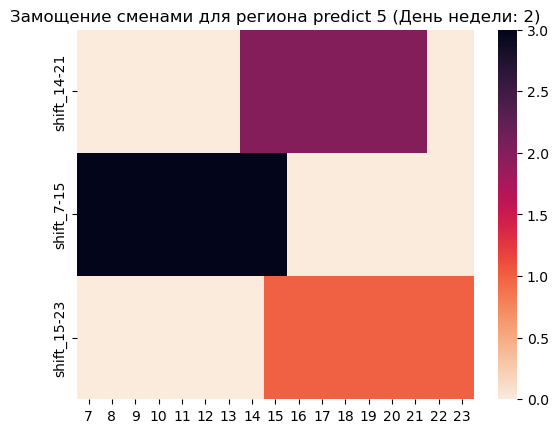

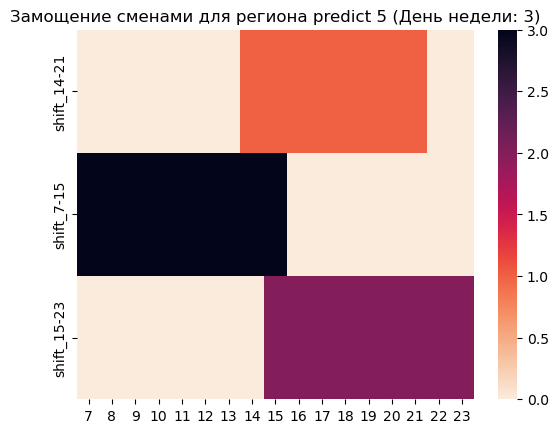

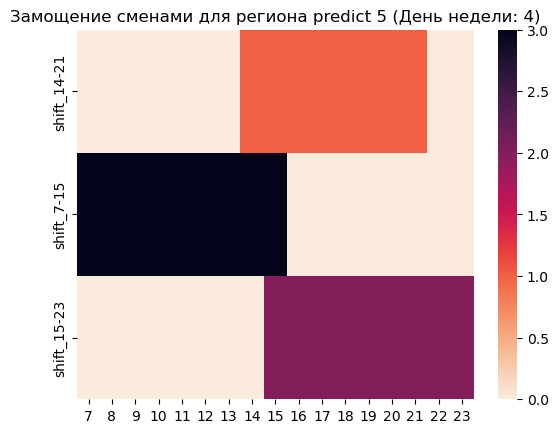

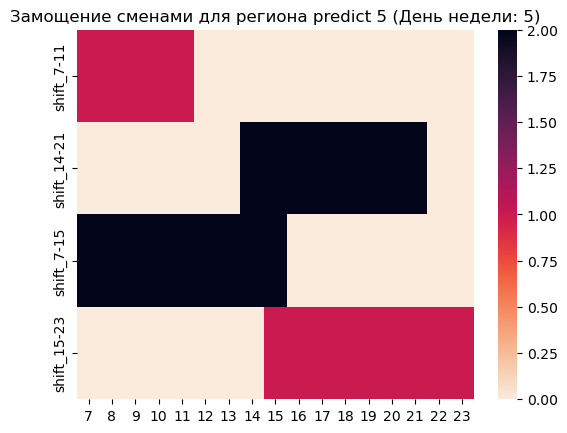

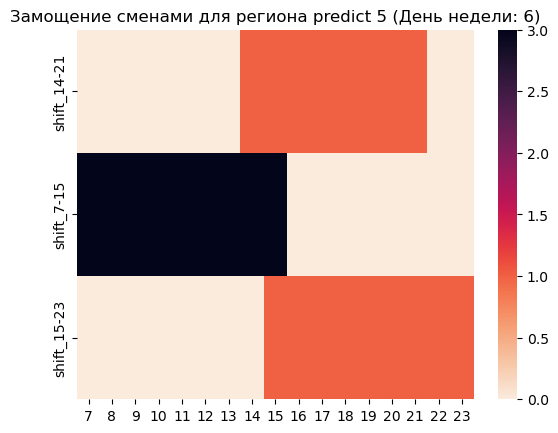

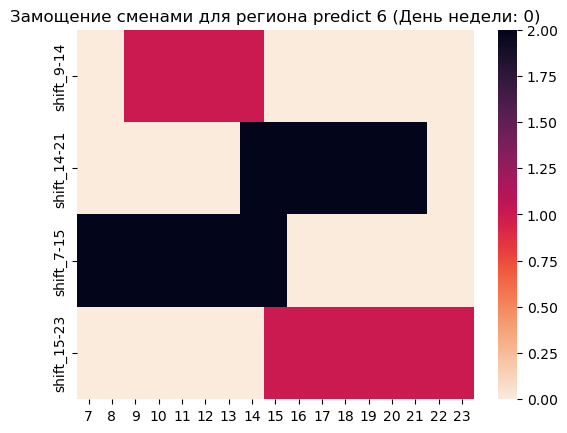

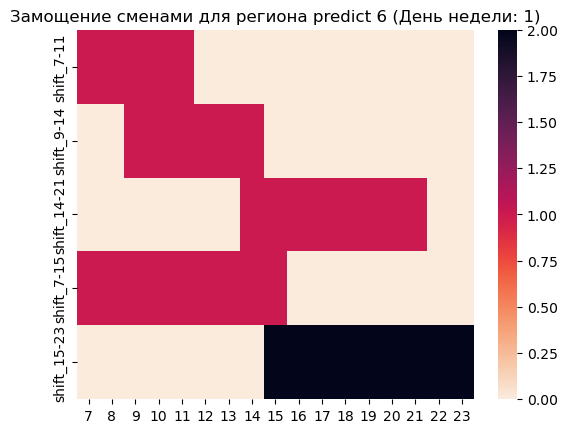

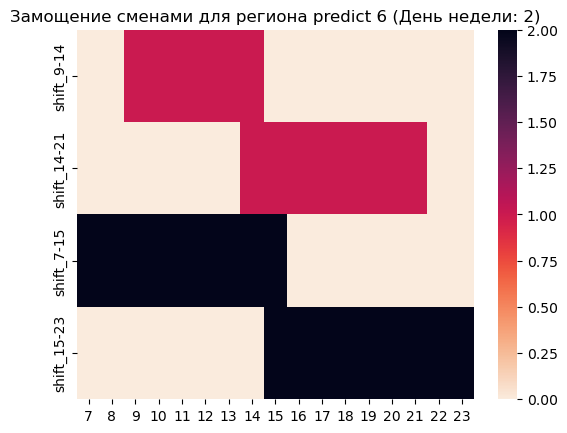

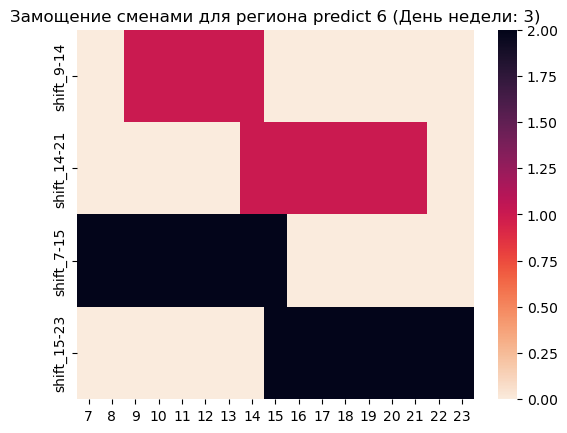

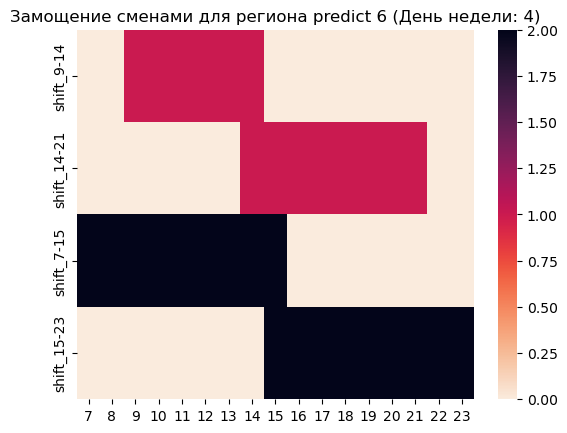

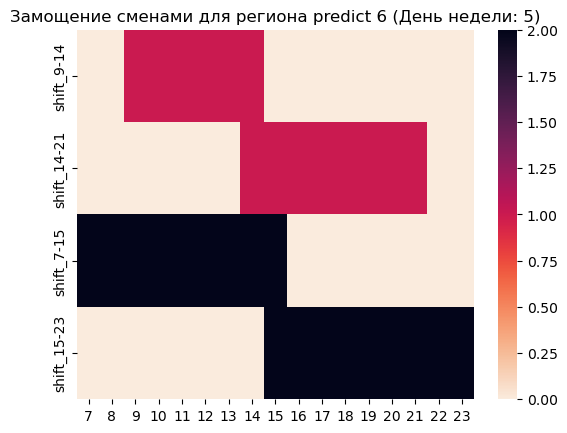

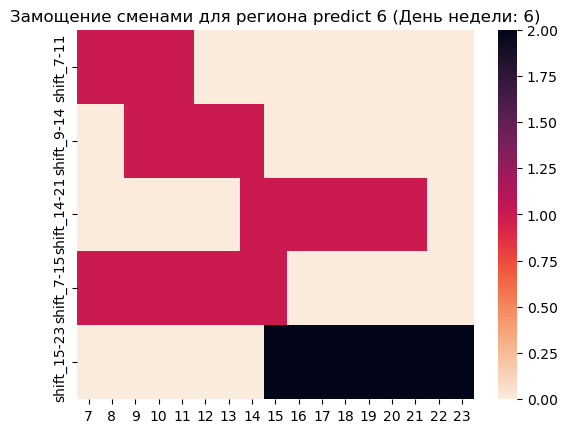

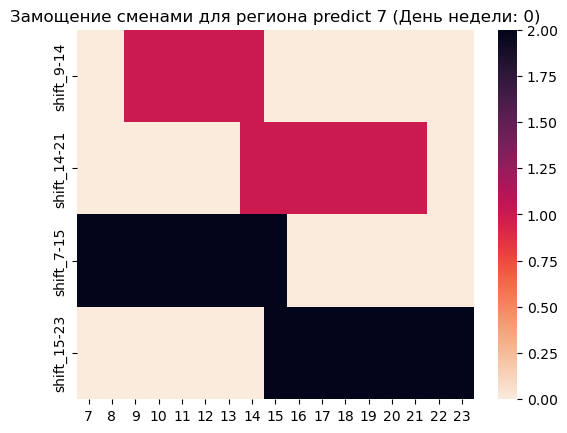

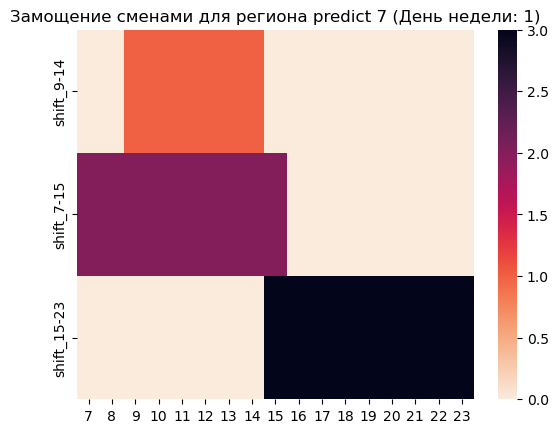

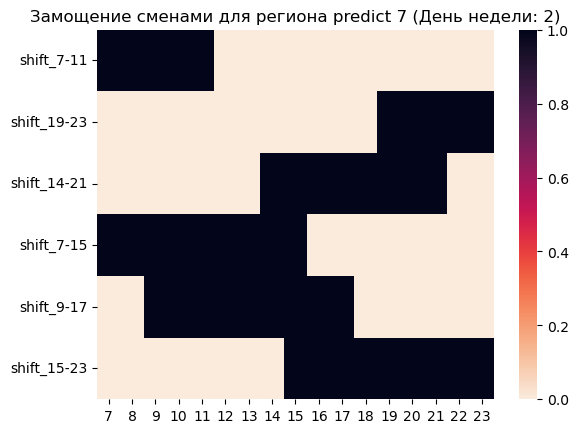

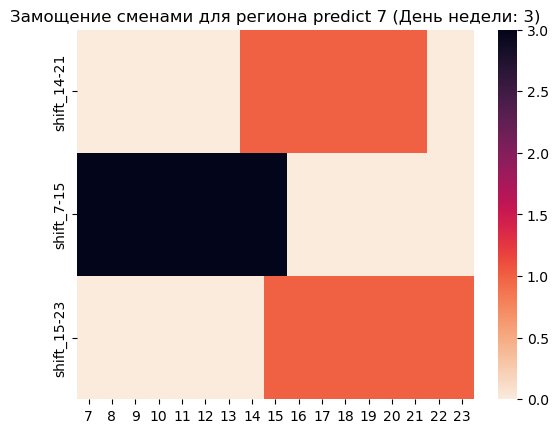

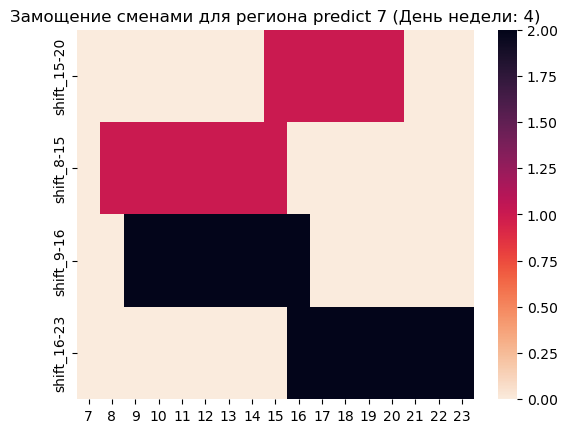

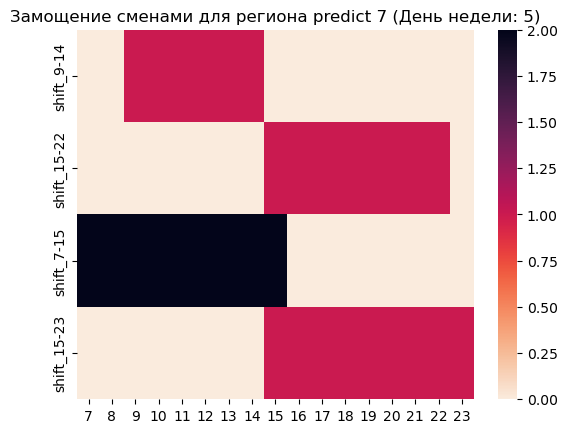

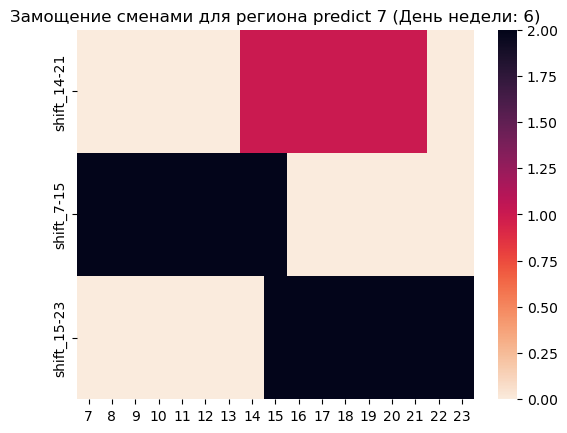

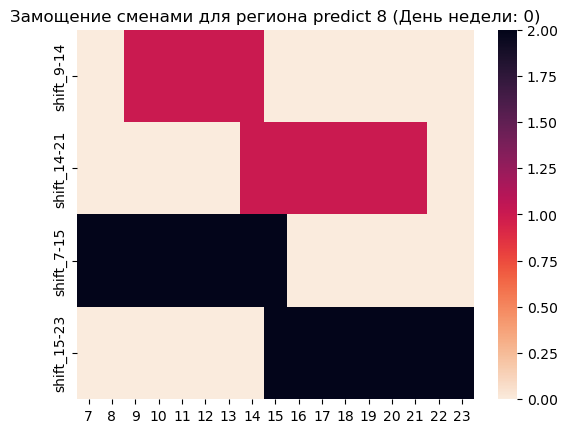

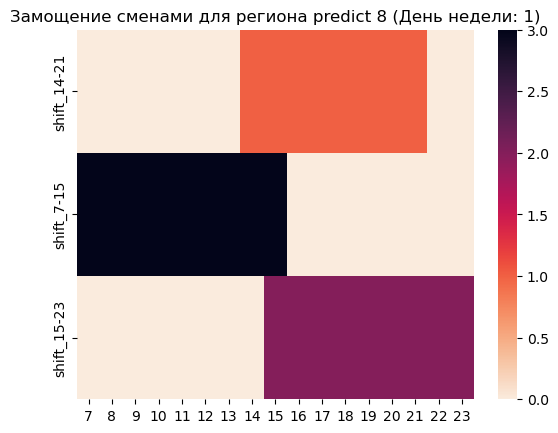

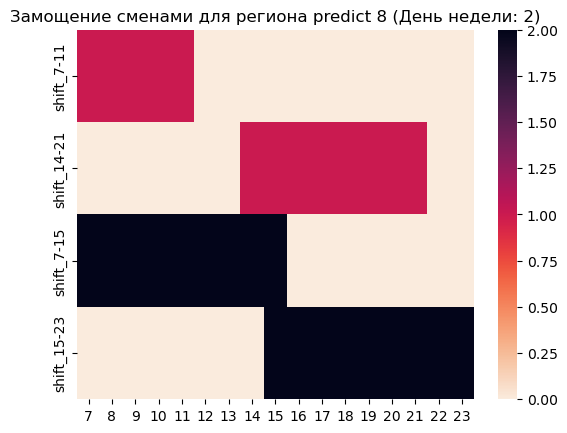

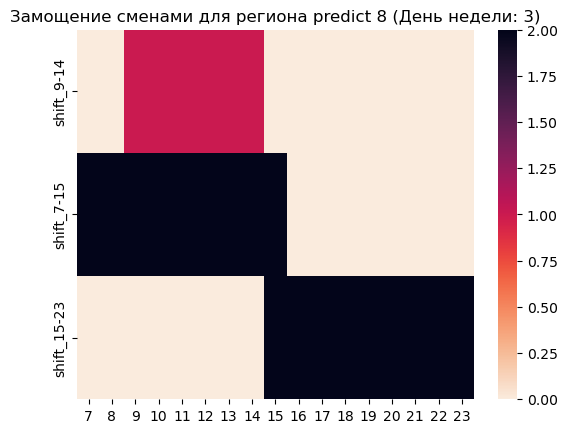

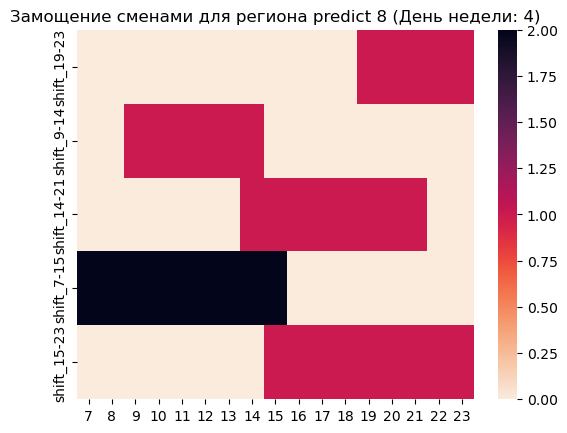

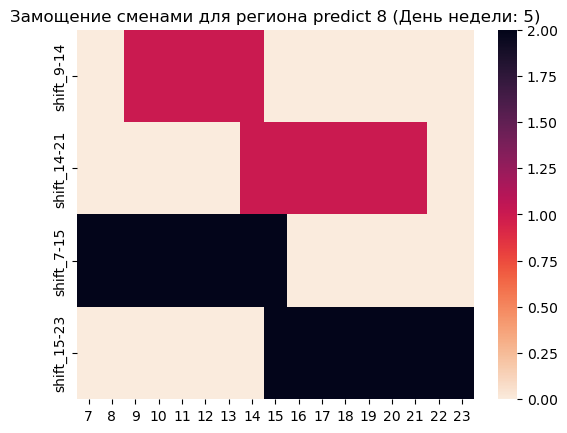

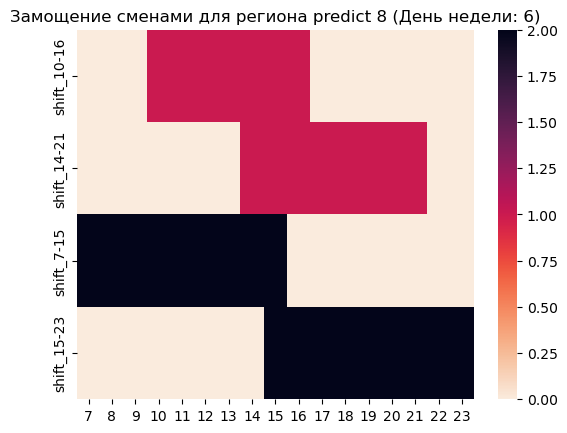

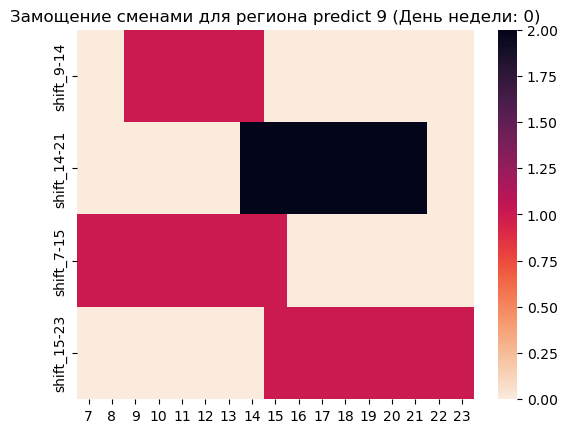

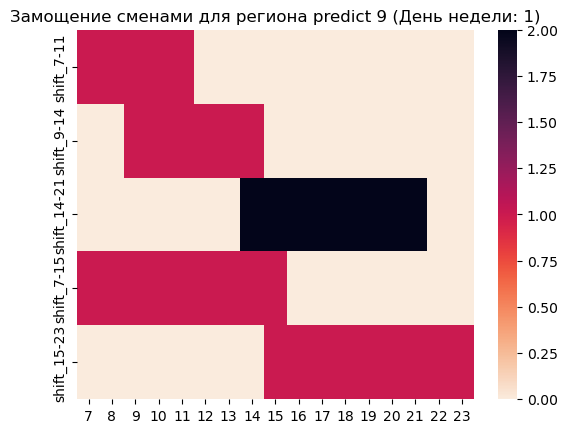

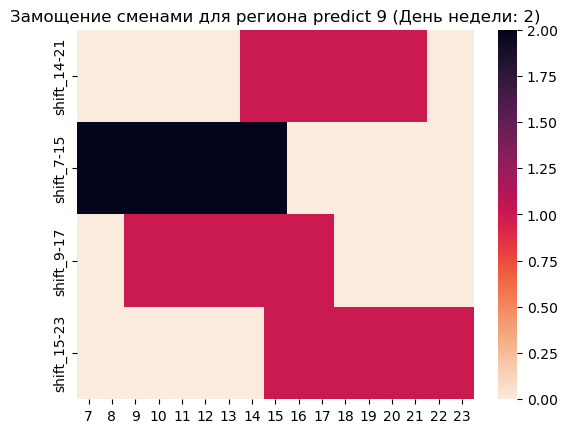

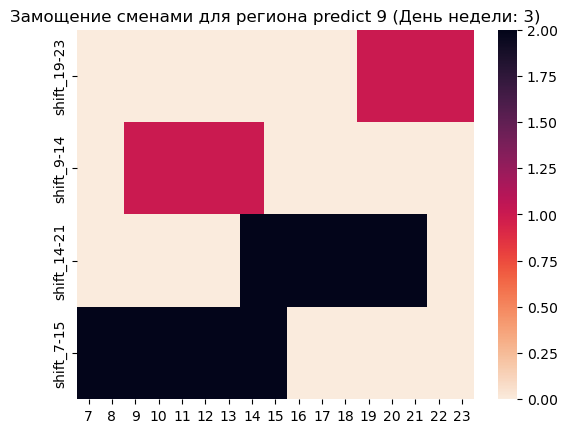

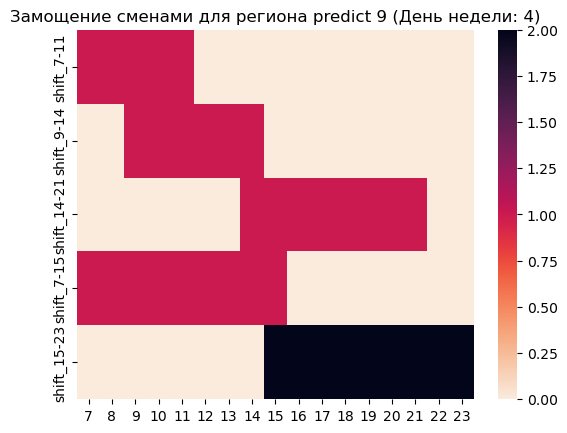

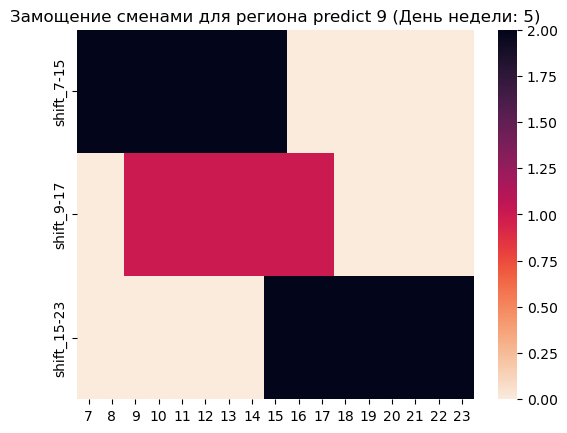

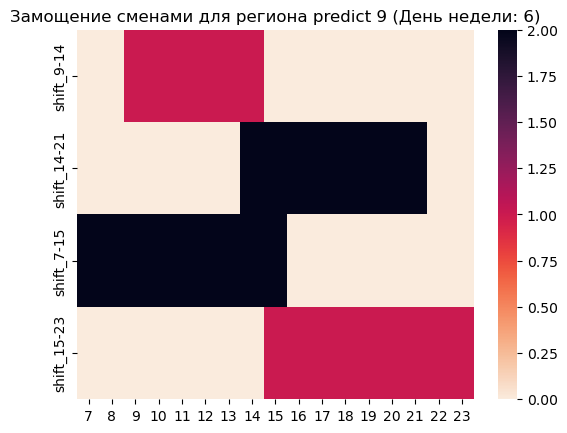

In [32]:
for j in range(0,10):
    for i in range(0,7):
        shifts_heatmap(i, j)